# PSEI Stock Performance: A Random Forest Classification Method

Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this project, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy.


## 1. Introduction to Random Forest algorithm



Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.


Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name `Random Forest`. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.



## 2. Random Forest algorithm intuition


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


## 3. Advantages and disadvantages of Random Forest algorithm


The advantages of Random forest algorithm are as follows:-


1.	Random forest algorithm can be used to solve both classification and regression problems.
2.	It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3.	Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem. 
4.	Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5.	Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-


1.	The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2.	The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


## 4. Feature selection with Random Forests



Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 


We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest. 


The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building. 


## 5. Dataset description


The dataset used here were ratios extract from **Bloomberg Terminal** of AB Capital.

## 6. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## 7. Import dataset

In [3]:
df = pd.read_csv('pseifinancialratios base2 .csv')

## 8. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(326, 23)

We can see that there are 326 instances and 23 variables in the data set. However, only 22 variables (columns) will be used since one column is for the weights of each stock in a particular quarter.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,X,Quarters,Performance,Weights,Earnings.per.Share,Price.to.Sales,Operating.Margins,Price.to.Book,ROE,ROA,...,PE,Debt.to.Equity,Book.Value.Per.Share,Net.Debt.to.EBITDA,Current.Ratio,Profit.Margin,Total.Debt.to.Total.Asset,Return.on.Capital,FCF.to.Basic.Share,Tangible.Book.value.per.Share
0,ABOITIZ EQUITY VENTURES INC,12/29/16,1,5.46,0.83,3.41,22.74,3.01,22.80,192167.95,...,18.91,149.50,24.72,5.21,2.08,13.82,54.61,9.77,0.45,17.38
1,ABOITIZ EQUITY VENTURES INC,3/31/17,0,5.40,0.99,3.27,22.10,2.95,22.80,197944.10,...,19.28,144.31,25.85,5.07,2.21,14.77,54.70,9.90,0.96,18.51
2,ABOITIZ EQUITY VENTURES INC,6/28/19,0,3.50,1.20,1.46,18.82,1.75,20.31,267448.69,...,14.48,146.87,30.33,5.83,1.19,13.58,53.60,8.52,1.04,19.28
3,ABOITIZ EQUITY VENTURES INC,12/27/19,0,3.59,0.36,1.07,14.40,1.25,19.07,263666.67,...,10.34,161.44,30.28,5.92,1.30,4.45,54.76,8.06,1.65,18.25
4,ABOITIZ EQUITY VENTURES INC,3/31/20,1,3.73,0.36,1.35,13.23,1.49,17.81,268457.72,...,14.97,161.40,30.49,6.35,1.32,4.37,55.02,6.99,0.85,18.45


### Check column names

In [6]:
df.columns 

Index(['X', 'Quarters', 'Performance', 'Weights', 'Earnings.per.Share',
       'Price.to.Sales', 'Operating.Margins', 'Price.to.Book', 'ROE', 'ROA',
       'Dividend.Yield', 'EPS.Growth', 'Earnings.Yield', 'PE',
       'Debt.to.Equity', 'Book.Value.Per.Share', 'Net.Debt.to.EBITDA',
       'Current.Ratio', 'Profit.Margin', 'Total.Debt.to.Total.Asset',
       'Return.on.Capital', 'FCF.to.Basic.Share',
       'Tangible.Book.value.per.Share'],
      dtype='object')

We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              326 non-null    object 
 1   Quarters                       326 non-null    object 
 2   Performance                    326 non-null    int64  
 3   Weights                        326 non-null    float64
 4   Earnings.per.Share             326 non-null    float64
 5   Price.to.Sales                 326 non-null    float64
 6   Operating.Margins              326 non-null    float64
 7   Price.to.Book                  326 non-null    float64
 8   ROE                            326 non-null    float64
 9   ROA                            326 non-null    float64
 10  Dividend.Yield                 326 non-null    float64
 11  EPS.Growth                     326 non-null    float64
 12  Earnings.Yield                 326 non-null    flo

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [8]:
for col in df.columns:
    print(df[col].value_counts())   

ABOITIZ EQUITY VENTURES INC     15
FIRST GEN CORPORATION           15
ROBINSONS RETAIL HOLDINGS IN    15
PUREGOLD PRICE CLUB INC         15
PLDT INC                        15
MANILA ELECTRIC COMPANY         15
ABOITIZ POWER CORP              15
GLOBE TELECOM INC               15
UNIVERSAL ROBINA CORP           15
AYALA LAND INC                  15
ALLIANCE GLOBAL GROUP INC       15
EMPERADOR INC                   15
AYALA CORPORATION               15
INTL CONTAINER TERM SVCS INC    14
SM PRIME HOLDINGS INC           14
ROBINSONS LAND CO               14
DMCI HOLDINGS INC               13
SM INVESTMENTS CORP             13
GT CAPITAL HOLDINGS INC         13
LT GROUP INC                    12
METRO PACIFIC INVESTMENTS CO    12
JOLLIBEE FOODS CORP              9
JG SUMMIT HOLDINGS INC           6
PETRON CORP                      5
SAN MIGUEL CORP                  3
ENERGY DEVELOPMENT CORP          2
SEMIRARA MINING AND POWER CO     1
Name: X, dtype: int64
12/29/16    25
3/31/17     25
6/2

We can see that the all variables are categorical in nature. So, we will treat them as categorical variables.

### Summary of variables


- There are 23 variables in the dataset, 22 are independent variables and 1 is the dependent or target variable. All the variables are of categorical data type.

- `Performance` is the target variable.

### Explore `class` variable

In [9]:
df['Performance'].value_counts()

0    173
1    153
Name: Performance, dtype: int64

### Missing values in variables

In [10]:
# check missing values in variables

df.isnull().sum()

X                                0
Quarters                         0
Performance                      0
Weights                          0
Earnings.per.Share               0
Price.to.Sales                   0
Operating.Margins                0
Price.to.Book                    0
ROE                              0
ROA                              0
Dividend.Yield                   0
EPS.Growth                       0
Earnings.Yield                   0
PE                               0
Debt.to.Equity                   0
Book.Value.Per.Share             0
Net.Debt.to.EBITDA               0
Current.Ratio                    0
Profit.Margin                    0
Total.Debt.to.Total.Asset        0
Return.on.Capital                0
FCF.to.Basic.Share               0
Tangible.Book.value.per.Share    0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## 9. Declare feature vector and target variable

In [14]:
X = df.iloc[:,4:]

y = df['Performance']

## 10. Split data into separate training and test set

In [15]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((218, 19), (108, 19))

## 11. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [17]:
# check data types in X_train

X_train.dtypes

Earnings.per.Share               float64
Price.to.Sales                   float64
Operating.Margins                float64
Price.to.Book                    float64
ROE                              float64
ROA                              float64
Dividend.Yield                   float64
EPS.Growth                       float64
Earnings.Yield                   float64
PE                               float64
Debt.to.Equity                   float64
Book.Value.Per.Share             float64
Net.Debt.to.EBITDA               float64
Current.Ratio                    float64
Profit.Margin                    float64
Total.Debt.to.Total.Asset        float64
Return.on.Capital                float64
FCF.to.Basic.Share               float64
Tangible.Book.value.per.Share    float64
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [18]:
X_train.head()

,Earnings.per.Share,Price.to.Sales,Operating.Margins,Price.to.Book,ROE,ROA,Dividend.Yield,EPS.Growth,Earnings.Yield,PE,Debt.to.Equity,Book.Value.Per.Share,Net.Debt.to.EBITDA,Current.Ratio,Profit.Margin,Total.Debt.to.Total.Asset,Return.on.Capital,FCF.to.Basic.Share,Tangible.Book.value.per.Share
226,34.22,1.63,25.45,2.54,39.74,207067.00,-10.36,95.99,15.35,11.06,203.04,526.89,2.25,0.42,15.93,44.01,9.81,34.96,215.33
143,19.60,0.71,7.04,0.61,4.99,112008.00,-5.32,7.52,7.95,11.11,67.29,898.93,9.74,2.45,8.70,34.90,6.10,2.23,852.41
66,8.07,2.34,12.37,1.33,6.21,378684.37,-0.90,-4.99,4.58,48.76,83.62,540.86,9.34,1.73,10.28,33.03,4.82,-8.52,506.78
202,7.16,0.79,6.87,3.32,22.24,30039.00,0.53,26.50,6.18,11.64,85.04,93.57,0.78,0.73,7.64,19.94,16.45,-2.27,74.45
18,0.28,1.56,21.70,1.63,24.04,195406.20,-0.69,-42.86,14.81,12.32,189.75,16.14,5.01,1.20,7.39,57.19,8.74,0.81,9.78


We can see that all  the variables are numerical data type.

We now have training and test set ready for model building. 

## 12. Random Forest Classifier model with default parameters

In [19]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5463


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## 13. Random Forest Classifier model with parameter n_estimators=1000.

In [27]:
# instantiate the classifier with n_estimators = 100

rfc_1000 = RandomForestClassifier(n_estimators=1000, random_state=0)

# fit the model to the training set

rfc_1000.fit(X_train, y_train)

# Predict on the test set results

y_pred_1000 = rfc_1000.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5370


The model accuracy score with 10 decision-trees is 0.5463 but the same with 1000 decision-trees is 0.5370. So, as expected accuracy decreases with number of decision-trees in the model.

## 14. Find important features with Random Forest model


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [30]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [32]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

EPS.Growth                       0.066468
Earnings.per.Share               0.063612
Dividend.Yield                   0.061314
Return.on.Capital                0.059462
Debt.to.Equity                   0.059326
Current.Ratio                    0.056378
Profit.Margin                    0.054367
ROA                              0.053964
PE                               0.053771
Price.to.Book                    0.053657
Earnings.Yield                   0.050458
FCF.to.Basic.Share               0.049388
Operating.Margins                0.049164
Total.Debt.to.Total.Asset        0.048645
ROE                              0.048034
Book.Value.Per.Share             0.046291
Tangible.Book.value.per.Share    0.045892
Price.to.Sales                   0.041292
Net.Debt.to.EBITDA               0.038517
dtype: float64

The higher the score, the more important the feature is.

## 15. Visualize the feature scores of the features


Now, I will visualize the feature scores with matplotlib and seaborn.

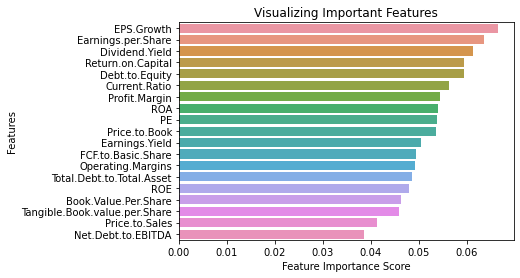

In [33]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

## 17. Build the Random Forest model on selected features

In [37]:
# declare feature vector and target variable

X = df.drop(['Net.Debt.to.EBITDA','Price.to.Sales','X','Quarters', 'Performance', 'Weights'], axis=1)

y = df['Performance']

In [38]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [42]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)

# Check accuracy score 

print('Model accuracy score with some variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with some variables removed : 0.5556


## 18. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n')

pd.DataFrame(cm)

Confusion matrix




,0,1
0,36,20
1,28,24


## 19. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        56
           1       0.55      0.46      0.50        52

    accuracy                           0.56       108
   macro avg       0.55      0.55      0.55       108
weighted avg       0.55      0.56      0.55       108

